# Exploratory Analysis - *Phragmites australis* identification

Image file is stored locally.

Please note, you will need more than 8GB of RAM to process the .tif image, which is 875MB in size. At least 16GB of RAM is recommended, if not 32GB.

In [29]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.titlesize'] = 20

### Read image file

In [2]:
with rio.open('Clip_Zone01_1OCT2019_bgre.tif', 'r+') as src:
    saltlake_csf = src.read()
    saltlake_csf_meta = src.meta

TypeError: Clip_Zone01_1OCT2019_bgre.tif: No such file or directory

### Display image data

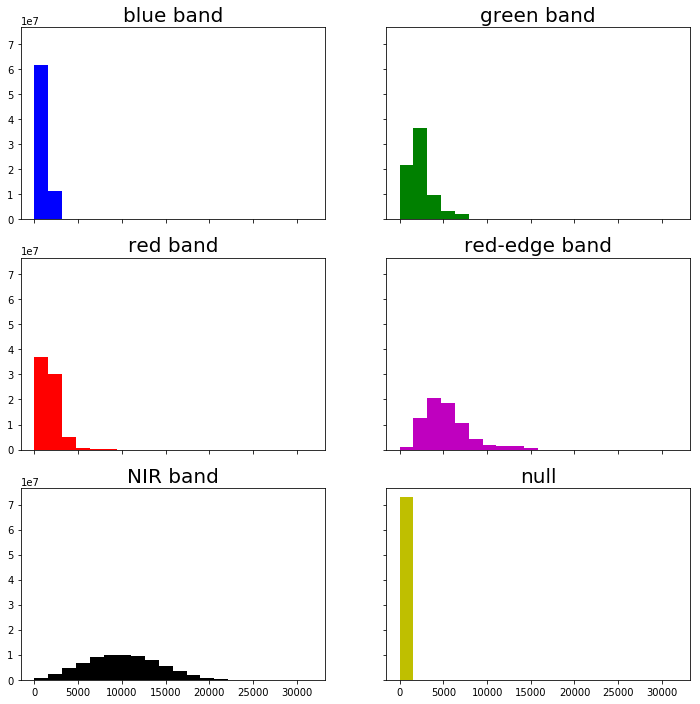

In [4]:
colors = ['b', 'g', 'r', 'm', 'k', 'y']
titles = ['blue band', 'green band', 'red band', 'red-edge band', 'NIR band', 'null']
ep.hist(saltlake_csf, 
        colors=colors, 
        title=titles, 
        cols=2)
plt.show()

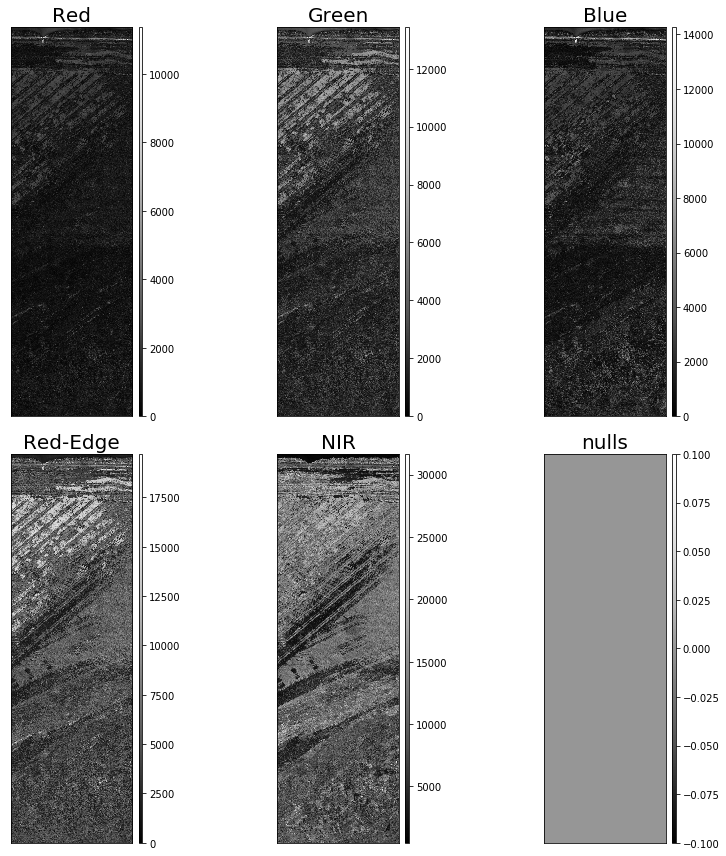

In [27]:
titles = ["Red", "Green", "Blue", "Red-Edge", "NIR", "nulls"]
ep.plot_bands(saltlake_csf,
              scale=False,
             title=titles)
plt.show()

### Create true color composite

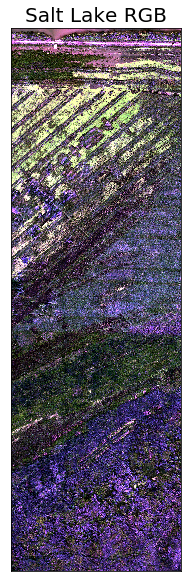

In [26]:
ep.plot_rgb(
    saltlake_csf, rgb=[0, 1, 2], title="Salt Lake RGB",
    stretch=True
)
plt.show()

### Create false color composite

**Display** <br></br>
Below, the first color is the display color (i.e., RGB computer monitor) and the second is the information (band) mapped to that color. <br></br>
Red = Red (band 2) <br></br>
Green = Near-infrared (band 4) <br></br>
Blue = Green (band 1)

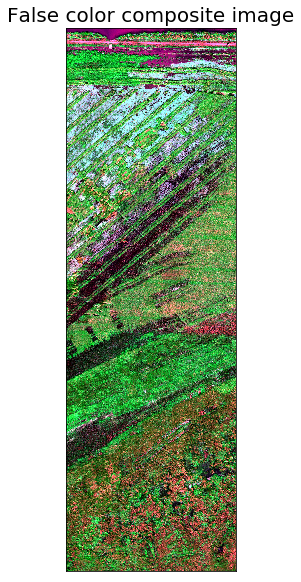

In [38]:
ep.plot_rgb(saltlake_csf,
           rgb=[2, 4, 1],
           title="False color composite image",
           stretch=True)
plt.show()

The near-infrared is mapped to the green display. In the image, green highlights vegetation, and brighter values indicate healthier or denser vegetation.

### Calculate and display NDVI values as an image

The normalized difference vegetation index (NDVI) is the difference of near-infrared reflectance to red reflectance, over the sum of the two bands; NIR-red/NIR+red. The NDVI is the most common index used to show vegetation cover and health.

In [8]:
saltlake_ndvi = es.normalized_diff(saltlake_csf[4], saltlake_csf[2])

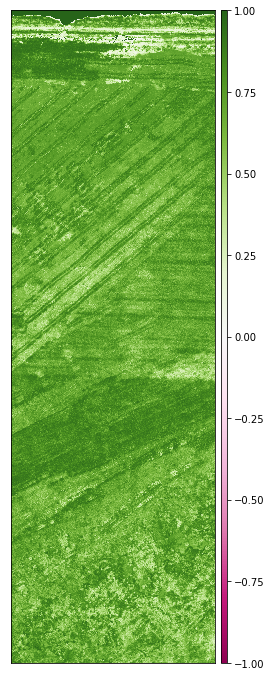

In [9]:
ep.plot_bands(saltlake_ndvi, cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1)
plt.show()

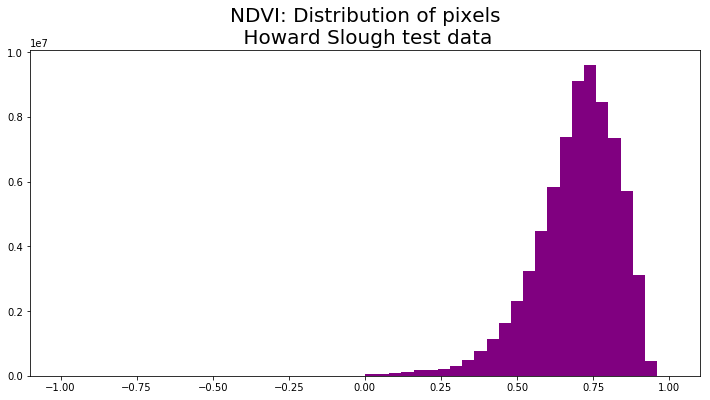

In [10]:
ep.hist(saltlake_ndvi,
        bins = 50,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n Howard Slough test data"],
        hist_range = [-1,1])
plt.show()

The NDVI distribution is skewed to the left; it is not a normal distribution. There are other indices of plant health that may be useful, such as the NDRE.

### Calculate and display NDRE values as an image

The normalized difference red-edge index (NDRE) is the difference of near-infrared reflectance to red-edge reflectance, over the sum of the two bands; NIR-redEdge/NIR+redEdge. The NDRE is very similar to NDVI, but is usually more useful in mid-late growing season. This is because light in the red-edge region penetrate further than light in the red spectrum, and therefore the NDRE is more effective when plants are at their maximum chlorophyll content. https://eos.com/agriculture/ndre/

In [33]:
saltlake_ndre = es.normalized_diff(saltlake_csf[4], saltlake_csf[3])

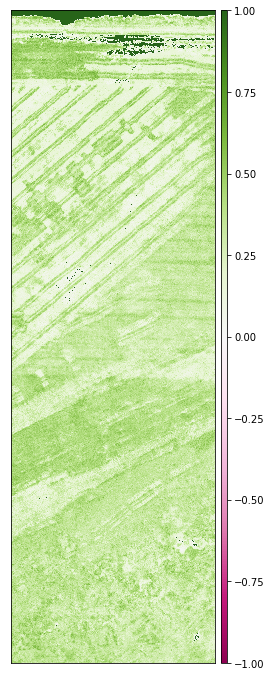

In [34]:
ep.plot_bands(saltlake_ndre, cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1)
plt.show()

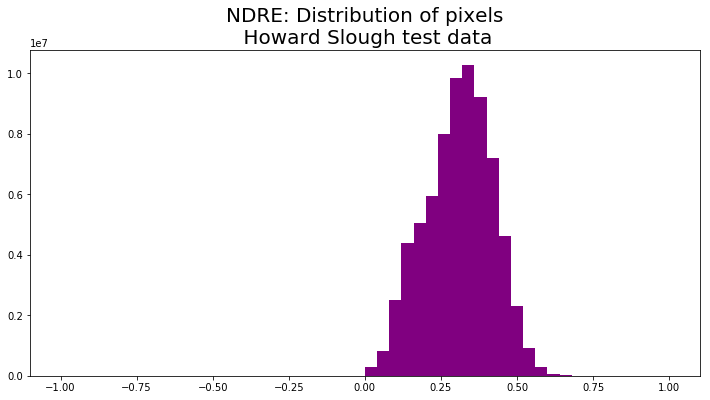

In [36]:
ep.hist(saltlake_ndre,
        bins = 50,
        figsize=(12, 6),
        title=["NDRE: Distribution of pixels\n Howard Slough test data"],
        hist_range = [-1,1])
plt.show()

The NDRE looks very close to a normal distribution, much more so than the NDVI.

# 03.26.20: Greg Updates

Let's take a look at the training data: 

In [11]:
train_directory = './Train/images/'

#GRAMA ut cty schools2019.pdf
image_path = []

for file in os.listdir(train_directory):
    filename = os.fsdecode(file)
    image_path.append(train_directory + filename)

In [35]:
image_path[10]

'./Train/images/000000007.tif'

In [36]:
#Running tests on example: 000000007
with rio.open(image_path[10], 'r+') as src:
    test_image = src.read()
    test_image_meta = src.meta

In [37]:
print("The shape of the training image is {0} by {1} by {2}".format(test_image.shape[0],
                                                                    test_image.shape[1],test_image.shape[2]))

The shape of the training image is 6 by 32 by 32


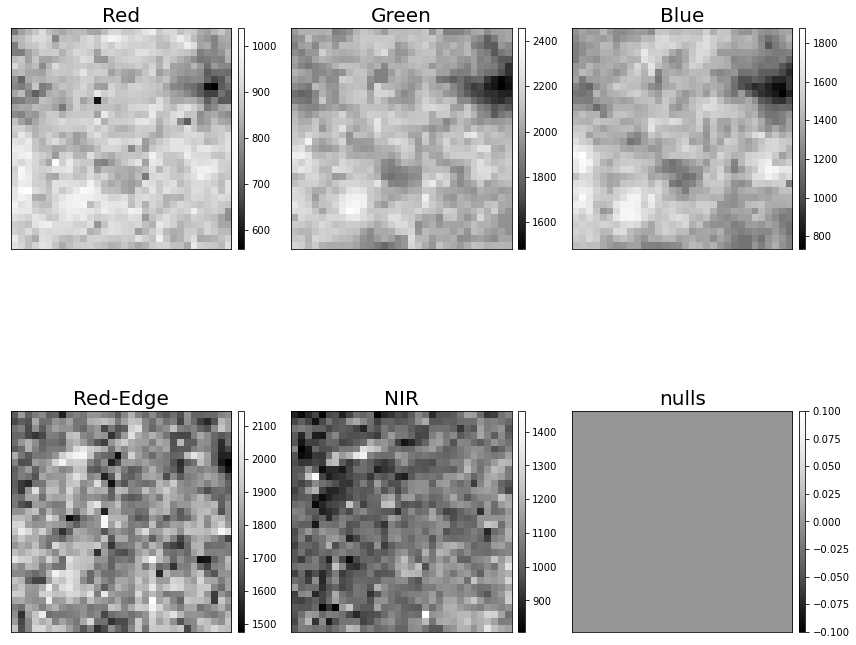

In [38]:
#Let's plot this example:
titles = ["Red", "Green", "Blue", "Red-Edge", "NIR", "nulls"]
ep.plot_bands(test_image,
              scale=False,
             title=titles)
plt.show()

In [28]:
#Is it necessary that we keep the nulls? Is it adding any information?


In [39]:
#Let's see if we can visualize what a label looks like: 
label_directory = './Train/labels/'

#GRAMA ut cty schools2019.pdf
label_path = []

for file in os.listdir(label_directory):
    filename = os.fsdecode(file)
    label_path.append(label_directory + filename)

In [40]:
#Check it matches:
label_path[0]

'./Train/labels/000000007.txt'

**Classes:**

|Class | Number|
| --- | --- |
| Water | 1 | 
| Soil | 2 |
| NPV | 3 |
| Algae | 4 | 
| Bulrush | 5 |
| Cattail | 6 |
| Phragmites | 7 |

**Label Organization:**  
First colum = label
<br>2-4 = skip
<br>5 = left pixel
<br>6 = top pixel
<br>7 = right pixel
<br>8 = bottom pixel

In [52]:
#Question: How does this correlate into a mask? 

# 0.00    0.00    6.82   10.35 are the coordinates: 

# so for this example: the area is 1 which means it is of class water
test_label_df = pd.read_csv(label_path[0],
                            sep = ' ',header = None).dropna(axis =1)[[2,9,13,17,20]].rename(columns = {2:'Label',
                                                                                                     9:'Left',
                                                                                                     13:'Top',
                                                                                                     17:'Right',
                                                                                                     20:'Bottom'})